<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/retinaNet/retinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# start

In [2]:
# installs
!pip3 install retinaface &> /dev/null

In [43]:
# imports
import os
import numpy as np
import cv2 
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow
import glob
import itertools

In [4]:
# loading dataset
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset

!gdown --id 1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp #loading the dataset(zip file) from google drive link to colab
!unzip /content/RMFD.zip &> /dev/null #unzipping our file
!rm -rf /content/RMFD.zip &> /dev/null #deleting the zip file

Downloading...
From: https://drive.google.com/uc?id=1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp
To: /content/RMFD.zip
640MB [00:02, 222MB/s]


In [46]:
# pre processing the dataset
# https://stackoverflow.com/questions/18394147/recursive-sub-folder-search-and-return-files-in-a-list-python
# https://stackoverflow.com/questions/11574195/how-to-merge-multiple-lists-into-one-list-in-python

def generate_image_paths(dir_path):
  files_jpg = glob.glob(dir_path + '/**/*.jpg', recursive=True)
  files_jpeg = glob.glob(dir_path + '/**/*.jpeg', recursive=True)
  files_png = glob.glob(dir_path + '/**/*.png', recursive=True)
  files_JPEG = glob.glob(dir_path + '/**/*.JPEG', recursive=True)
  paths = list(itertools.chain(files_jpg, files_jpeg, files_png, files_JPEG))
  return paths

dataset_path = "/content/self-built-masked-face-recognition-dataset/"
unmasked_face_dataset_path = dataset_path + "AFDB_face_dataset/"
masked_face_dataset_path = dataset_path + "AFDB_masked_face_dataset/"
unmasked_paths = generate_image_paths(unmasked_face_dataset_path)
masked_paths = generate_image_paths(masked_face_dataset_path)

print(len(unmasked_paths))
print(len(masked_paths))

90468
2203


In [6]:
# retinaNet model, retinaFace for Face Detection
# https://pypi.org/project/retinaface/

def retinaFace_detector(image_path, detector):
  image = detector.read(image_path)
  faces = detector.predict(image)
  return faces

In [7]:
# openCV image cropping function
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

def openCV_image_cropping(image_path, face):
  img = cv2.imread(image_path)
  crop_img = img[face["y1"]:face["y2"], face["x1"]:face["x2"]]
  return crop_img

model[normal quality] init ..
model success !


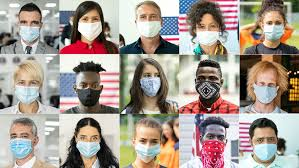

[{'x1': 263, 'y1': 12, 'x2': 284, 'y2': 41, 'left_eye': (269, 23), 'right_eye': (278, 23), 'nose': (274, 29), 'left_lip': (270, 34), 'right_lip': (278, 34)}, {'x1': 137, 'y1': 5, 'x2': 160, 'y2': 36, 'left_eye': (143, 17), 'right_eye': (153, 16), 'nose': (149, 22), 'left_lip': (145, 28), 'right_lip': (153, 27)}, {'x1': 135, 'y1': 128, 'x2': 161, 'y2': 161, 'left_eye': (142, 141), 'right_eye': (154, 142), 'nose': (148, 149), 'left_lip': (142, 153), 'right_lip': (152, 153)}, {'x1': 139, 'y1': 64, 'x2': 161, 'y2': 95, 'left_eye': (147, 75), 'right_eye': (156, 75), 'nose': (152, 80), 'left_lip': (148, 86), 'right_lip': (155, 86)}, {'x1': 79, 'y1': 9, 'x2': 101, 'y2': 37, 'left_eye': (85, 19), 'right_eye': (95, 18), 'nose': (91, 23), 'left_lip': (87, 29), 'right_lip': (94, 29)}, {'x1': 9, 'y1': 124, 'x2': 33, 'y2': 158, 'left_eye': (13, 137), 'right_eye': (24, 136), 'nose': (18, 142), 'left_lip': (15, 149), 'right_lip': (23, 148)}, {'x1': 77, 'y1': 126, 'x2': 100, 'y2': 155, 'left_eye': (83

In [57]:
# passing random image from the dataset through retinaNet Face Detection model and visualising the output

detector = RetinaFace(quality='normal')
random_image_path = "/content/sample_image.jpg"
random_image = cv2.imread(random_image_path)
cv2_imshow(random_image)
faces = retinaFace_detector(random_image_path, detector)
print(faces)

In [58]:
# passing random image face detection output of retinaNet Face Detection model to openCV image cropping function and visualising the image
if(len(faces)>0):
  for face in faces:
      cropped_face = openCV_image_cropping(random_image_path, face)
      cv2_imshow(cropped_face)

In [ ]:
# passing all images from the dataset through retinaNet Face Detection model (no visualisation)

In [ ]:
# passing all images face detection output of retinaNet Face Detection model to openCV image cropping function (no visualisation)